In [32]:
import sys
import pickle
import bz2
import pandas as pd
import docx2txt
from pathlib import Path

In [2]:
sys.setrecursionlimit(10**5)

In [3]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_prepared.pkl.bz2 11_prepared.pkl.bz2 doc_lbe.pkl.bz2
10_prepared.pkl.bz2 card_lbe.pkl.bz2


In [118]:
with bz2.open(data_path / 'doc_lbe.pkl.bz2', 'rb') as f:
    doc_lbe = pickle.load(f)
    
with bz2.open(data_path / 'card_lbe.pkl.bz2', 'rb') as f:
    card_lbe = pickle.load(f)

In [119]:
with bz2.open(data_path / '09_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341
...,...,...,...,...,...,...,...,...,...,...,...
42100853,2020-09-30 11:26:28,350DE9C7-F602-EB11-B444-005056A7539A,0,A465340,25292,17528,1.0,130.00,False,1739990,4850561
42100854,2020-09-30 08:12:39,6D7ACBFB-DB02-EB11-B444-005056A7539A,0,A698682,30740,19188,2.0,120.00,False,1761351,10015419
42100855,2020-09-30 09:54:24,F96D45E8-E902-EB11-B444-005056A7539A,0,7790662,30741,19188,1.0,73.00,False,1432778,22816791
42100856,2020-09-30 12:00:04,12067064-FB02-EB11-B444-005056A7539A,0,2751739,34835,15916,1.0,78.00,False,484390,1648929


In [120]:
df.drop(['id_card', 'id_doc'], axis=1, inplace=True)
df

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0,61,97,2.0,88.00,False,1065358,642341
...,...,...,...,...,...,...,...,...,...
42100853,2020-09-30 11:26:28,0,25292,17528,1.0,130.00,False,1739990,4850561
42100854,2020-09-30 08:12:39,0,30740,19188,2.0,120.00,False,1761351,10015419
42100855,2020-09-30 09:54:24,0,30741,19188,1.0,73.00,False,1432778,22816791
42100856,2020-09-30 12:00:04,0,34835,15916,1.0,78.00,False,484390,1648929


In [34]:
text = docx2txt.process(data_path / 'product_groups.docx')
dic = {x for x in text.split('\n')}
dic.remove('') if '' in dic else dic

id_tov = []
id_group = []
name_group = []
for d in dic:
    line = d.split(';')
    id_tov.append(line[0])
    id_group.append(line[1])
    name_group.append(line[2])

data = {
    'id_tov': id_tov,
    'id_group': id_group,
    'name_group': name_group
       }
dataframe = pd.DataFrame.from_dict(data)

In [35]:
dataframe.to_csv(data_path / 'product_groups.csv', index = False)

# Statistics

In [103]:
import sys
import pickle
import bz2

from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter

sys.setrecursionlimit(10**5)

In [78]:
products = pd.read_csv(filepath_or_buffer=data_path / 'product_groups.csv')
products.head()

,id_tov,id_group,name_group
0,36558,10084,Блинчики
1,25484,10053,Икра
2,28727,10103,"Сэндвичи, пирожки"
3,36309,10266,Полуготовые блюда
4,37079,10346,Косметика и средства гигиены для детей


In [67]:
df.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,1.944076e+06,2.341787e+07
mean,7.765869e+05,1.763064e+04,1.045977e+04,1.427065e+00,1.149112e+02,9.720375e+05,1.170893e+07
std,2.032896e+06,1.103226e+04,8.794764e+03,3.101411e+01,1.072201e+02,5.612065e+05,6.760157e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.452600e+04,3.850000e+02,1.000000e+00,4.800000e+01,4.860188e+05,5.854467e+06
50%,0.000000e+00,1.943500e+04,1.358100e+04,1.000000e+00,8.900000e+01,9.720375e+05,1.170893e+07
75%,0.000000e+00,2.455800e+04,1.630400e+04,1.000000e+00,1.501100e+02,1.458056e+06,1.756340e+07
max,6.673056e+06,3.866000e+04,2.194300e+04,5.000000e+03,3.840000e+04,1.944075e+06,2.341787e+07


In [87]:
unique_cards_amount = df['id_card_int'].nunique()
unique_cards_amount

1944076

# 1. Find sum and quantity outliers

## 1.1 Zero and negative sum

### First, let's check all records for the presence of a zero cost of goods, while excluding those for which a discount is indicated (is_green)

In [287]:
zero_sum = df[(df['sum'] == 0) & (df['is_green'] == False)]
zero_sum

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
6032,2020-09-01 10:38:06,5534007,22492,102,1.0,0.0,False,747570,1218486
6033,2020-09-01 10:15:59,5563859,22492,102,1.0,0.0,False,106917,23176383
6579,2020-09-01 15:22:32,5578751,31719,102,1.0,0.0,False,278483,15825820
13816,2020-09-01 09:53:21,5561085,22492,102,1.0,0.0,False,180463,2029875
13818,2020-09-01 15:42:31,5577896,22492,102,1.0,0.0,False,838956,21281807
...,...,...,...,...,...,...,...,...,...
42095202,2020-09-30 20:23:59,0,1113,-9999,1000.0,0.0,False,748287,1145037
42095203,2020-09-30 20:31:05,0,1113,-9999,5000.0,0.0,False,748344,6069250
42097752,2020-09-30 09:58:13,6630948,24800,102,1.0,0.0,False,1576068,19690485
42098523,2020-09-30 13:23:52,6645658,31719,102,1.0,0.0,False,1932500,10399582


<AxesSubplot:xlabel='quantity'>

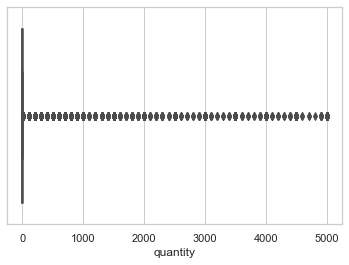

In [288]:
sns.boxplot(x = zero_sum['quantity'])

#### It can be seen from the graph that there are many cases of purchases of a small quantity of goods at zero cost and individual cases of purchases of a large number of free goods.

#### This is due to promotions like 1 + 1 = 3, when a small amount of goods in the check will be free. And a large amount of free goods in the check most likely speaks of transportation between stores.

#### Therefore, we will take into account all free purchases, if there were more than 5 free goods, as an atypical activity.

In [289]:
zero_sum = zero_sum[(zero_sum['quantity'] > 5)]
zero_sum

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
27520,2020-09-01 13:32:18,0,1113,-9999,5000.0,0.0,False,806096,21763622
37567,2020-09-01 15:53:48,0,1113,-9999,2000.0,0.0,False,1438102,4834001
43897,2020-09-01 12:51:22,0,1113,-9999,5000.0,0.0,False,72344,21320546
57565,2020-09-01 21:20:20,0,1113,-9999,5000.0,0.0,False,427981,14419056
69522,2020-09-01 11:14:28,0,1113,-9999,4000.0,0.0,False,1528414,8674916
...,...,...,...,...,...,...,...,...,...
42082068,2020-09-30 15:02:54,0,1113,-9999,3000.0,0.0,False,697590,3322572
42082069,2020-09-30 17:27:05,0,1113,-9999,5000.0,0.0,False,697590,6892522
42092816,2020-09-30 12:27:49,0,1113,-9999,2000.0,0.0,False,44611,21891204
42095202,2020-09-30 20:23:59,0,1113,-9999,1000.0,0.0,False,748287,1145037


#### It is interesting to note that almost all purchases refer to one mysterious product:

In [290]:
Counter(zero_sum['id_tov'])

Counter({1113: 5109, 20542: 1, 36247: 1, 16306: 1})

In [291]:
products[products['id_tov'] == '1113']

,id_tov,id_group,name_group


#### Now let's check the cases when a negative amount appears in the check - most likely, this indicates fraud or some kind of internal store operations.

In [292]:
negative_sum = df[(df['sum'] < 0)]
negative_sum

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206092,2020-09-04 09:10:21,0,23074,19269,1.268,-470.43,False,1301664,11939194
4206102,2020-09-04 09:09:24,0,23074,19269,1.268,-470.43,False,1419650,22549976
4210124,2020-09-04 08:37:00,0,23074,19269,1.084,-402.16,False,1035577,6745380
4218019,2020-09-04 08:43:37,0,23074,19269,0.001,-0.37,False,126995,16694740
4218021,2020-09-04 08:43:37,0,23074,19269,2.375,-881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...
5396780,2020-09-04 08:37:49,0,23074,19269,1.236,-458.56,False,906517,2630312
5438901,2020-09-04 09:28:21,0,23074,19269,0.572,-212.21,False,1102820,21125316
5450157,2020-09-04 09:21:17,0,23074,19269,0.915,-339.47,False,574393,18763274
5450159,2020-09-04 09:21:17,0,23074,19269,0.915,-339.47,False,574393,18763274


In [293]:
Counter(negative_sum['id_tov'])

Counter({23074: 68, 22492: 1})

In [294]:
products[products['id_tov'] == '23074']

,id_tov,id_group,name_group
1017,23074,10157,Экзотика


#### Are exotic goods sold at exotic negative prices?...

## 1.2 Zero and negative quantity

### Now let's check how many such places are in receipts, where the quantity of goods is negative or zero. I think this also speaks about the internal operations of the store.

In [295]:
zero_quantity = df[(df['quantity'] == 0)]
zero_quantity

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
76223,2020-09-01 19:48:39,5588920,15738,19687,0.0,0.79,False,116224,22979294
144688,2020-09-01 17:10:48,0,28662,19687,0.0,0.89,False,1741530,5901464
1211336,2020-09-01 19:50:39,0,23008,17616,0.0,0.51,False,974892,4375162
1649328,2020-09-02 22:07:29,0,731,17268,0.0,0.14,False,145090,5928667
2013148,2020-09-02 16:28:46,0,731,21309,0.0,0.18,False,183930,7056809
...,...,...,...,...,...,...,...,...,...
40844727,2020-09-30 20:07:33,0,22911,17394,0.0,0.23,False,29462,3367001
40845729,2020-09-30 20:07:33,0,37885,19438,0.0,0.38,False,29462,3367001
41157457,2020-09-30 17:58:33,0,22911,17394,0.0,0.46,False,670914,18810832
41705116,2020-09-30 13:05:17,0,15817,15255,0.0,0.22,False,748972,1020540


In [296]:
Counter(zero_quantity['id_tov'])

Counter({15738: 1,
         28662: 1,
         23008: 2,
         731: 9,
         23074: 2,
         15374: 3,
         16063: 3,
         608: 1,
         18939: 4,
         37274: 1,
         15378: 3,
         24618: 1,
         541: 1,
         730: 3,
         17456: 5,
         16645: 3,
         15817: 4,
         609: 5,
         606: 4,
         605: 5,
         654: 1,
         21335: 2,
         659: 1,
         691: 1,
         37877: 1,
         37885: 4,
         27473: 2,
         15923: 2,
         26741: 1,
         686: 3,
         1113: 2,
         22939: 1,
         22911: 3,
         16517: 1,
         15846: 3,
         15775: 1,
         15519: 2,
         1713: 2,
         22564: 2,
         667: 2,
         19767: 2,
         15198: 2,
         602: 1,
         618: 1,
         619: 1,
         626: 1,
         668: 1,
         690: 2,
         837: 1,
         838: 1,
         1169: 1,
         14403: 1,
         14405: 1,
         15456: 1,
         15550: 1

In [297]:
products[products['id_tov'] == '27896']

,id_tov,id_group,name_group
1141,27896,10069,"Фрукты, ягоды, бахчевые"


#### This time, all the goods are different, it seems, but... in fact, almost all of them are all sorts of vegetables and fruits, which are what? right, they are weighed! Note also, that the value of these items is very small but positive. So I think that there are just problems with preserving the digits after the decimal point, and in fact there are not zero products, but just a few.

#### So we will not add these cases to outliers.


In [298]:
negative_quantity = df[(df['quantity'] < 0)]
negative_quantity

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206093,2020-09-04 09:10:21,0,23074,19269,-1.268,470.43,False,1301664,11939194
4206103,2020-09-04 09:09:24,0,23074,19269,-1.268,470.43,False,1419650,22549976
4210123,2020-09-04 08:37:00,0,23074,19269,-1.084,402.16,False,1035577,6745380
4218020,2020-09-04 08:43:37,0,23074,19269,-0.001,0.37,False,126995,16694740
4218022,2020-09-04 08:43:37,0,23074,19269,-2.375,881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...
5382631,2020-09-04 09:13:44,0,23074,19269,-0.692,256.73,False,1538576,12752264
5396781,2020-09-04 08:37:49,0,23074,19269,-1.236,458.56,False,906517,2630312
5438902,2020-09-04 09:28:21,0,23074,19269,-0.572,212.21,False,1102820,21125316
5450158,2020-09-04 09:21:17,0,23074,19269,-0.915,339.47,False,574393,18763274


#### Interestingly, the number of negative sums is the same as the number of negative quantities. Apparently, these are really some internal processes of the store. Adding to outliers!

# 2. Quantity and sum analysis

## 2.1 Quantity analysis

### Now let's see what the quantities of purchased goods look like for individuals. To do this, let's group by people and take the average of the amount of products they buy.

/Users/ana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='quantity'>

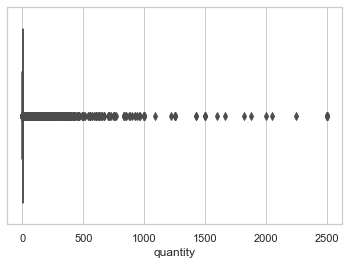

In [299]:
quantity_means = df.groupby(["id_card_int"])['id_card_int', 'quantity', 'id_tov', 'sum'].mean()
sns.boxplot(x = quantity_means['quantity'])

<AxesSubplot:xlabel='quantity'>

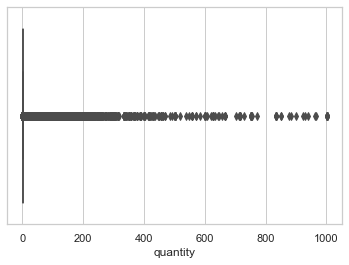

In [300]:
sns.boxplot(x = quantity_means['quantity'][quantity_means['quantity'] < 1050])

#### It can be seen from the graph that mostly people buy a small amount for each product, and the larger the average quantity, the fewer people match it. Outliers are obvious: buyers who, on average, buy more than a thousand items for one product alone. It is clear that these are also some cases of transportation between stores. Adding to outliers.

In [301]:
quantity_means = quantity_means[quantity_means['quantity'] > 1050]
quantity_means

,id_card_int,quantity,id_tov,sum
id_card_int,,,,
13674,13674.0,1250.750000,10198.500000,58.500000
96409,96409.0,1500.500000,14210.000000,60.000000
129045,129045.0,1429.037714,8723.571429,103.457143
204875,204875.0,2500.500000,880.000000,2.500000
316607,316607.0,1250.750000,5017.000000,30.250000
461466,461466.0,1220.487800,6130.700000,27.325000
464885,464885.0,2500.500000,8822.000000,22.000000
549510,549510.0,2250.386000,19543.000000,41.812500
664126,664126.0,2500.500000,12878.000000,30.000000


## 2.2 Sum analysis

### Now let's see what the sums of purchased goods look like for individuals. To do this, let's group by people and take the average of the cost of products they buy.

/Users/ana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='sum'>

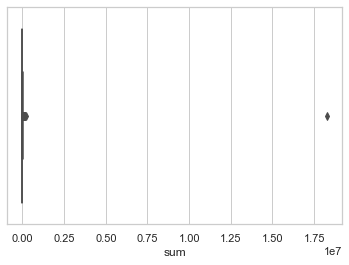

In [302]:
sums = df.groupby(["id_card_int"])['id_card_int', 'quantity', 'id_tov', 'sum'].sum()
sns.boxplot(x = sums['sum'])

#### We have one huge outlier!

In [303]:
outlier = sums[sums['sum'] > 10000000]
outlier

,id_card_int,quantity,id_tov,sum
id_card_int,,,,
883386,167677263432,229022.537,4163789442,18259091.85


In [304]:
outlier = df[df['id_card_int'] == 883386]
outlier

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
1221,2020-09-01 13:41:07,0,20813,14782,1.0,168.0,False,883386,16003441
1853,2020-09-01 18:51:35,0,27495,14911,1.0,34.0,False,883386,12641780
1859,2020-09-01 18:04:23,0,27695,15385,2.0,152.0,False,883386,23313124
1925,2020-09-01 18:51:35,0,29568,13354,1.0,36.0,False,883386,12641780
1976,2020-09-01 18:04:23,0,30560,13614,1.0,17.0,False,883386,23313124
...,...,...,...,...,...,...,...,...,...
42100270,2020-09-30 17:11:56,0,28799,15916,1.0,130.0,False,883386,15650853
42100329,2020-09-30 18:29:17,0,30218,12554,1.0,185.0,False,883386,15143032
42100460,2020-09-30 17:11:56,0,35061,20817,1.0,150.0,False,883386,15650853
42100484,2020-09-30 15:55:39,0,36157,12638,1.0,190.0,False,883386,19534242


In [305]:
outlier.groupby(["id_card_int"]).mean()

,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,,,,,,,
883386,0.0,21936.386751,11188.841606,1.206576,96.195667,0.00187,1.173007e+07


#### It seems that everything is in order, just this person buys very often and very much, but the average cost of the product is not high.

<AxesSubplot:xlabel='sum'>

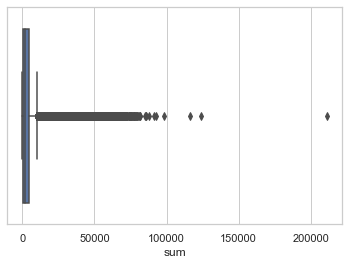

In [306]:
sns.boxplot(x = sums['sum'][sums['sum'] < 10000000])

In [307]:
outlier = sums[(sums['sum'] < 10000000) & (sums['sum'] > 200000)]
outlier

,id_card_int,quantity,id_tov,sum
id_card_int,,,,
568930,428404290,1869.601,17156402,211154.31


In [308]:
outlier = df[df['id_card_int'] == 568930]
outlier.groupby(["id_card_int"]).mean()

,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,,,,,,,
568930,2.968059e+06,22784.066401,11598.887118,2.48287,280.41741,0.010624,7.904497e+06


#### This outlier behaves as the one above

<AxesSubplot:xlabel='sum'>

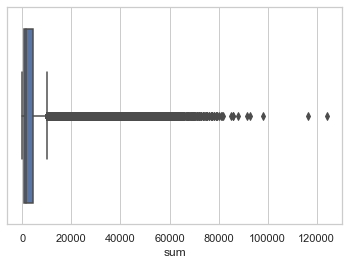

In [309]:
sns.boxplot(x = sums['sum'][sums['sum'] < 200000])

In [310]:
outlier = sums[(sums['sum'] < 200000) & (sums['sum'] > 120000)]
outlier

,id_card_int,quantity,id_tov,sum
id_card_int,,,,
1243870,879416090,1032.448,14823178,124131.91


In [311]:
outlier = df[df['id_card_int'] == 1243870]
outlier.groupby(["id_card_int"]).mean()

,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,,,,,,,
1243870,0.0,20966.305516,13549.920792,1.460322,175.575545,0.007072,1.072293e+07


### Same case: a lot of orders, mean sum and quantity are normal

<AxesSubplot:xlabel='sum'>

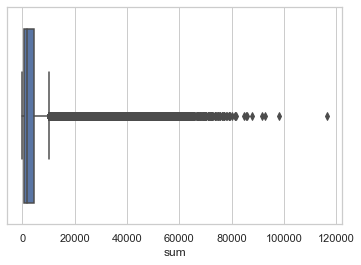

In [312]:
sns.boxplot(x = sums['sum'][sums['sum'] < 120000])

In [313]:
outlier = sums[(sums['sum'] < 120000) & (sums['sum'] > 100000)]
outlier

,id_card_int,quantity,id_tov,sum
id_card_int,,,,
1755035,26325525,51.0,279221,116411.2


In [314]:
outlier = df[df['id_card_int'] == 1755035]
outlier

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
37540025,2020-09-28 15:32:19,0,21379,15189,5.0,12000.0,False,1755035,18226861
37540026,2020-09-28 15:33:25,0,21379,15189,5.0,12000.0,False,1755035,18593568
37543109,2020-09-28 14:00:04,0,21379,15189,2.0,4800.0,False,1755035,2923518
37696290,2020-09-28 13:29:03,0,21379,15189,1.0,1800.6,True,1755035,13667043
37696291,2020-09-28 13:29:03,0,21379,15189,1.0,1800.6,True,1755035,13667043
37706914,2020-09-28 16:05:19,0,21379,15189,2.0,4800.0,False,1755035,1855111
38058645,2020-09-28 08:36:51,6518049,647,13567,1.0,5.0,False,1755035,14218897
38060133,2020-09-28 08:36:51,6518049,21379,15189,4.0,9600.0,False,1755035,14218897
38060134,2020-09-28 08:36:51,6518049,21379,18018,16.0,38400.0,False,1755035,14218897
38069401,2020-09-28 12:30:21,0,21379,15189,3.0,7200.0,False,1755035,9054795


In [315]:
products[products['id_tov'] == '21379']

,id_tov,id_group,name_group
2539,21379,10053,Икра


#### Here's something new: a huge caviar lover in front of us

<AxesSubplot:xlabel='sum'>

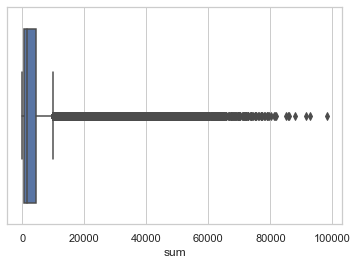

In [316]:
sns.boxplot(x = sums['sum'][sums['sum'] < 100000])

In [317]:
outlier = sums[(sums['sum'] < 100000) & (sums['sum'] > 95000)]
outlier

,id_card_int,quantity,id_tov,sum
id_card_int,,,,
1447941,755825202,767.353,11934022,98215.49


In [318]:
outlier = df[df['id_card_int'] == 1447941]
outlier

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
128211,2020-09-01 18:08:32,0,609,15048,0.426,51.12,False,1447941,5878966
128615,2020-09-01 18:08:32,0,14484,15645,1.000,270.00,False,1447941,5878966
129280,2020-09-01 18:08:32,0,19626,17391,1.000,275.00,False,1447941,5878966
129559,2020-09-01 18:08:32,0,21109,13659,1.000,62.00,False,1447941,5878966
129851,2020-09-01 18:08:32,0,23099,17394,1.000,90.00,False,1447941,5878966
...,...,...,...,...,...,...,...,...,...
42084985,2020-09-30 14:44:32,0,26960,14375,2.000,36.00,False,1447941,18388587
42085361,2020-09-30 14:44:32,0,34835,15916,1.000,78.00,False,1447941,18388587
42085429,2020-09-30 14:44:32,0,36843,15916,1.000,245.00,False,1447941,18388587
42085440,2020-09-30 14:44:32,0,36880,18851,2.000,234.00,False,1447941,18388587


#### It looks like these orders are okay and the high amounts are due to the frequency of the order. Perhaps these are some kind of companies; in any case, they do not order large quantities of goods on average, which means that this is definitely not a transportation between stores.

# 3. Orders analysis

### Finally, let's analyze the orders: to do this, we will group all records by receipts, that is, by order ID. We just need to take into account that all offline purchases have zero order ID, so we exclude them from the data.

/Users/ana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='sum'>

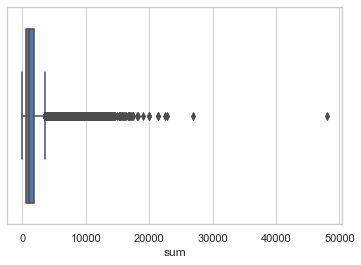

In [319]:
orders = df.groupby(["id_order"])['id_card_int', 'quantity', 'id_tov', 'sum', 'id_order'].sum()
orders = orders[orders['id_order'] > 0]
sns.boxplot(x = orders['sum'])

#### Wow, we have an outlier. Who is this?

In [320]:
outlier = orders[(orders['sum'] > 40000)]
outlier

,id_card_int,quantity,id_tov,sum,id_order
id_order,,,,,
6518049,5265105,21.0,43405,48005.0,19554147


In [321]:
outlier = df[df['id_order'] == 6518049]
outlier

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
38058645,2020-09-28 08:36:51,6518049,647,13567,1.0,5.0,False,1755035,14218897
38060133,2020-09-28 08:36:51,6518049,21379,15189,4.0,9600.0,False,1755035,14218897
38060134,2020-09-28 08:36:51,6518049,21379,18018,16.0,38400.0,False,1755035,14218897


#### This is our old friend - a caviar lover, everything is fine with him.

<AxesSubplot:xlabel='sum'>

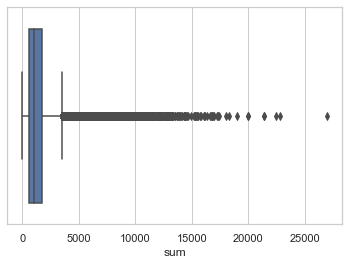

In [322]:
sns.boxplot(x = orders['sum'][(orders['sum'] < 40000)])

In [323]:
outlier = orders[(orders['sum'] < 40000) & (orders['sum'] > 25000)]
outlier

,id_card_int,quantity,id_tov,sum,id_order
id_order,,,,,
5846282,27877570,260.872,1211673,26956.31,286467818


In [324]:
outlier = df[df['id_order'] == 5846282]
outlier

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
13293188,2020-09-10 12:48:57,5846282,371,426,22.000,616.00,False,568930,4963467
13293474,2020-09-10 12:48:57,5846282,731,17268,0.208,18.30,False,568930,4963467
13293534,2020-09-10 12:48:57,5846282,1225,15554,4.000,372.00,False,568930,4963467
13293560,2020-09-10 12:48:57,5846282,1665,12091,3.000,273.00,False,568930,4963467
13293700,2020-09-10 12:48:57,5846282,15146,15747,1.000,86.00,False,568930,4963467
13293701,2020-09-10 12:48:57,5846282,15147,15747,1.000,66.00,False,568930,4963467
13293837,2020-09-10 12:48:57,5846282,15923,12774,0.522,81.43,False,568930,4963467
13293949,2020-09-10 12:48:57,5846282,17151,19317,4.000,612.00,False,568930,4963467
13294008,2020-09-10 12:48:57,5846282,18222,17394,0.562,111.28,False,568930,4963467
13294066,2020-09-10 12:48:57,5846282,18504,271,4.000,160.00,False,568930,4963467


#### It looks like the orders are okay too. Average costs, average quantities, everything looks legal.

# Finish

In [325]:
outliers = zero_sum.id_card_int.unique().tolist()

outliers.extend(negative_sum.id_card_int.unique().tolist())

outliers.extend(negative_quantity.id_card_int.unique().tolist())

outliers.extend(quantity_means.id_card_int.unique().tolist())

len(outliers)

3411

In [332]:
out = np.array(outliers)
out = np.unique(outliers)

In [333]:
out.shape

(3324,)

In [334]:
result_df = pd.DataFrame(out)

In [335]:
with bz2.open(data_path / 'outliers.pkl.bz2', 'wb') as f:
    pickle.dump(result_df, f, protocol=4)